In [1]:
!mkdir srag_data
!wget -nc -P srag_data/ https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/dados_semanais_faixa_etaria_sexo_virus.csv

mkdir: cannot create directory ‘srag_data’: File exists
File ‘srag_data/dados_semanais_faixa_etaria_sexo_virus.csv’ already there; not retrieving.



In [2]:
import pandas as pd
from covid19 import data

In [3]:
obitos = (
    pd.read_csv('srag_data/dados_semanais_faixa_etaria_sexo_virus.csv', sep=';', decimal=',')
    .query('`Tipo` == "Estado"')
    .query('dado == "obito"')
    .query('sexo == "Total"')
    .query('escala == "casos"')
#     .query('`Semana epidemiológica` < 23')
    .set_index(['Ano epidemiológico', 'Unidade da Federação', 'Semana epidemiológica'])
)

In [4]:
obitos.head()

data de publicação  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                      
2009               Rondônia             1                             2020-05-25   
                                        2                             2020-05-25   
                                        3                             2020-05-25   
                                        4                             2020-05-25   
                                        5                             2020-05-25   

                                                               UF    Tipo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica               
2009               Rondônia             1                      11  Estado   
                                        2                      11  Estado   
                                        3                      11  Estado   
                                        4                      11  Estado   
                                        5                      11  Estado   

                                                                dado escala  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                 
2009               Rondônia             1                      obito  casos   
                                        2                      obito  casos   
                                        3                      obito  casos   
                                        4                      obito  casos   
                                        5                      obito  casos   

                                                                sexo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica          
2009               Rondônia             1                      Total   
                                        2                      Total   
                                        3                      Total   
                                        4                      Total   
                                        5                      Total   

                                                              Ano e semana epidemiológica  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                               
2009               Rondônia             1                                         2009W01   
                                        2                                         2009W02   
                                        3                                         2009W03   
                                        4                                         2009W04   
                                        5                                         2009W05   

                                                                                           Situação do dado  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                                 
2009               Rondônia             1                      Dado estável. Sujeito a pequenas alterações.   
                                        2                      Dado estável. Sujeito a pequenas alterações.   
                                        3                      Dado estável. Sujeito a pequenas alterações.   
                                        4                      Dado estável. Sujeito a pequenas alterações.   
                                        5                      Dado estável. Sujeito a pequenas alterações.   

                                                               Total reportado até a última atualização  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                             
2009               Rondônia             1                                                           0.0   
                                        2                                                           0.0   
                

In [5]:
obitos_per_week = (
    obitos
    [['Total reportado até a última atualização']]
    .swaplevel(0, 2)
    .unstack()
    .droplevel(0, axis=1)
    [[2016, 2017, 2018, 2019, 2020]]
)

In [6]:
obitos_per_week

Ano epidemiológico                          2016  2017  2018  2019  2020
Semana epidemiológica Unidade da Federação                              
1                     Acre                   0.0   0.0   2.0   3.0   0.0
                      Alagoas                0.0   0.0   0.0   1.0   0.0
                      Amapá                  0.0   0.0   0.0   0.0   0.0
                      Amazonas               0.0   0.0   1.0   0.0   3.0
                      Bahia                  0.0   1.0   1.0   0.0   0.0
...                                          ...   ...   ...   ...   ...
53                    Roraima                NaN   NaN   NaN   NaN   NaN
                      Santa Catarina         NaN   NaN   NaN   NaN   NaN
                      Sergipe                NaN   NaN   NaN   NaN   NaN
                      São Paulo              NaN   NaN   NaN   NaN   NaN
                      Tocantins              NaN   NaN   NaN   NaN   NaN

[1431 rows x 5 columns]

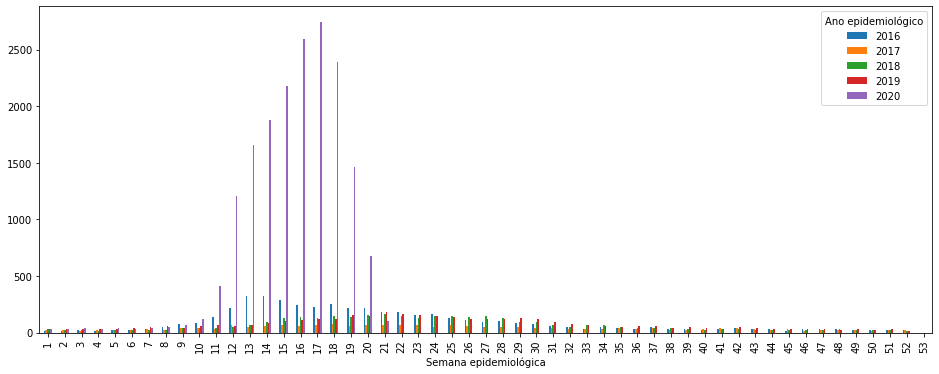

In [7]:
(
    obitos_per_week
    .groupby('Semana epidemiológica')
    .sum()
    .plot(kind='bar', figsize=(16,6))
)

In [8]:
(
    obitos
    [['Total reportado até a última atualização']]
    .unstack()
    .loc[2016:2020]
    .droplevel(0, axis=1)
)

Semana epidemiológica                     1    2    3    4    5    6     7   \
Ano epidemiológico Unidade da Federação                                       
2016               Acre                  0.0  2.0  1.0  1.0  2.0  0.0   0.0   
                   Alagoas               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Amapá                 0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Amazonas              0.0  0.0  0.0  0.0  0.0  0.0   1.0   
                   Bahia                 0.0  0.0  2.0  0.0  1.0  0.0   3.0   
...                                      ...  ...  ...  ...  ...  ...   ...   
2020               Roraima               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Santa Catarina        1.0  0.0  1.0  1.0  0.0  0.0   1.0   
                   Sergipe               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   São Paulo             8.0  7.0  7.0  8.0  5.0  8.0  16.0   
                   Tocantins             0.0  0.0  2.0  0.0  1.0  3.0   0.0   

Semana epidemiológica                      8     9     10  ...   44   45   46  \
Ano epidemiológico Unidade da Federação                    ...                  
2016               Acre                   0.0   0.0   1.0  ...  3.0  2.0  1.0   
                   Alagoas                0.0   1.0   0.0  ...  0.0  0.0  0.0   
                   Amapá                  0.0   1.0   1.0  ...  0.0  0.0  0.0   
                   Amazonas               0.0   0.0   0.0  ...  0.0  0.0  0.0   
                   Bahia                  5.0   1.0   3.0  ...  0.0  0.0  0.0   
...                                       ...   ...   ...  ...  ...  ...  ...   
2020               Roraima                0.0   0.0   0.0  ...  NaN  NaN  NaN   
                   Santa Catarina         3.0   0.0   1.0  ...  NaN  NaN  NaN   
                   Sergipe                1.0   0.0   2.0  ...  NaN  NaN  NaN   
                   São Paulo             10.0  18.0  62.0  ...  NaN  NaN  NaN   
                   Tocantins              0.0   1.0   0.0  ...  NaN  NaN  NaN   

Semana epidemiológica                     47   48   49   50   51   52  53  
Ano epidemiológico Unidade da Federação                                    
2016               Acre                  1.0  1.0  1.0  0.0  0.0  1.0 NaN  
                   Alagoas               0.0  0.0  0.0  0.0  0.0  0.0 NaN  
                   Amapá                 0.0  0.0  0.0  0.0  0.0  0.0 NaN  
                   Amazonas              0.0  0.0  0.0  0.0  0.0  0.0 NaN  
                   Bahia                 0.0  1.0  1.0  0.0  0.0  0.0 NaN  
...                                      ...  ...  ...  ...  ...  ...  ..  
2020               Roraima               NaN  NaN  NaN  NaN  NaN  NaN NaN  
                   Santa Catarina        NaN  NaN  NaN  NaN  NaN  NaN NaN  
                   Sergipe               NaN  NaN  NaN  NaN  NaN  NaN NaN  
                   São Paulo             NaN  NaN  NaN  NaN  NaN  NaN NaN  
                   Tocantins             NaN  NaN  NaN  NaN  NaN  NaN NaN  

[135 rows x 53 columns]

In [9]:
(
    obitos_per_week
)

Ano epidemiológico                          2016  2017  2018  2019  2020
Semana epidemiológica Unidade da Federação                              
1                     Acre                   0.0   0.0   2.0   3.0   0.0
                      Alagoas                0.0   0.0   0.0   1.0   0.0
                      Amapá                  0.0   0.0   0.0   0.0   0.0
                      Amazonas               0.0   0.0   1.0   0.0   3.0
                      Bahia                  0.0   1.0   1.0   0.0   0.0
...                                          ...   ...   ...   ...   ...
53                    Roraima                NaN   NaN   NaN   NaN   NaN
                      Santa Catarina         NaN   NaN   NaN   NaN   NaN
                      Sergipe                NaN   NaN   NaN   NaN   NaN
                      São Paulo              NaN   NaN   NaN   NaN   NaN
                      Tocantins              NaN   NaN   NaN   NaN   NaN

[1431 rows x 5 columns]

In [10]:
(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
)

Ano epidemiológico                          2016  2017  2018  2019
Semana epidemiológica Unidade da Federação                        
1                     Acre                   0.0   0.0   2.0   3.0
                      Alagoas                0.0   0.0   0.0   1.0
                      Amapá                  0.0   0.0   0.0   0.0
                      Amazonas               0.0   0.0   1.0   0.0
                      Bahia                  0.0   1.0   1.0   0.0
...                                          ...   ...   ...   ...
53                    Roraima                NaN   NaN   NaN   NaN
                      Santa Catarina         NaN   NaN   NaN   NaN
                      Sergipe                NaN   NaN   NaN   NaN
                      São Paulo              NaN   NaN   NaN   NaN
                      Tocantins              NaN   NaN   NaN   NaN

[1431 rows x 4 columns]

In [11]:
obitos_ema = (
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .groupby('Unidade da Federação')
    .apply(lambda df: df.ewm(halflife = 1, axis=1).mean())
    .swaplevel()
)

In [12]:
obitos_ema

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.000000,1.142857,2.133333
Alagoas,1,0.0,0.000000,0.000000,0.533333
Amapá,1,0.0,0.000000,0.000000,0.000000
Amazonas,1,0.0,0.000000,0.571429,0.266667
Bahia,1,0.0,0.666667,0.857143,0.400000
...,...,...,...,...,...
Roraima,53,NaN,NaN,NaN,NaN
Santa Catarina,53,NaN,NaN,NaN,NaN
Sergipe,53,NaN,NaN,NaN,NaN


In [13]:
# obitos without ewm for comparison

(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .swaplevel()
)

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.0,2.0,3.0
Alagoas,1,0.0,0.0,0.0,1.0
Amapá,1,0.0,0.0,0.0,0.0
Amazonas,1,0.0,0.0,1.0,0.0
Bahia,1,0.0,1.0,1.0,0.0
...,...,...,...,...,...
Roraima,53,NaN,NaN,NaN,NaN
Santa Catarina,53,NaN,NaN,NaN,NaN
Sergipe,53,NaN,NaN,NaN,NaN


In [14]:
baseline = obitos_ema[2019].unstack()

In [15]:
baseline

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Acre,2.133333,1.466667,1.000000,1.800000,1.733333,1.333333,0.933333,1.200000,1.066667,1.666667,...,1.666667,0.400000,0.333333,1.133333,2.066667,1.133333,0.400000,0.266667,0.066667,NaN
Alagoas,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,1.066667,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,1.066667,0.000000,NaN
Amapá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,0.000000,0.600000,0.200000,...,0.000000,0.000000,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
Amazonas,0.266667,0.533333,0.000000,1.066667,1.600000,1.866667,8.066667,10.666667,9.066667,5.866667,...,0.133333,0.133333,0.133333,0.000000,0.533333,1.600000,1.600000,0.533333,0.266667,NaN
Bahia,0.400000,0.800000,0.666667,0.400000,0.733333,2.400000,1.666667,0.600000,0.600000,1.800000,...,0.000000,0.800000,0.533333,0.000000,1.533333,0.600000,0.266667,1.066667,0.400000,NaN
Ceará,0.000000,0.666667,1.200000,1.333333,0.133333,1.733333,0.133333,0.533333,2.066667,1.200000,...,0.533333,0.000000,0.533333,0.533333,0.533333,0.000000,0.000000,0.000000,0.000000,NaN
Distrito Federal,0.133333,0.533333,0.533333,1.133333,1.066667,0.066667,0.266667,1.466667,1.200000,1.866667,...,0.600000,0.666667,0.800000,0.333333,0.200000,0.133333,0.066667,0.266667,0.533333,NaN
Espírito Santo,0.000000,0.000000,0.000000,0.000000,0.266667,0.133333,0.133333,0.466667,0.266667,0.933333,...,0.533333,0.000000,0.266667,0.266667,0.533333,0.866667,0.666667,0.000000,0.600000,NaN
Goiás,3.933333,0.133333,2.466667,0.266667,2.200000,0.733333,3.266667,4.133333,4.266667,3.600000,...,1.200000,1.400000,0.733333,1.333333,0.666667,0.666667,2.200000,1.600000,0.333333,NaN


In [16]:
current = (
    obitos_per_week
    [2020]
    .swaplevel()
    .unstack()
)

In [17]:
current

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazonas,3.0,6.0,2.0,4.0,5.0,3.0,3.0,4.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahia,0.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ceará,1.0,3.0,0.0,5.0,1.0,1.0,0.0,3.0,3.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distrito Federal,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Espírito Santo,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goiás,0.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
covid_cases = (
    obitos
    ['SARS-CoV-2']
    .loc[2020]
    .unstack()
)

In [19]:
covid_cases_wcota = data.load_cases('state', 'wcota')

In [20]:
last_update = obitos['data de publicação'].max()

In [21]:
last_update

'2020-05-25'

In [22]:
estados_siglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

In [23]:
covid_cases_wcota

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
,newCases,newCases,newCases,newCases,newCases,newCases,newCases,newCases,newCases,newCases,...,deaths,deaths,deaths,deaths,deaths,deaths,deaths,deaths,deaths,deaths
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-23,524,328,1764,436,443,549,303,398,91,2424,...,153,3905,184,115,81,176,103,86,6045,51
2020-05-24,293,584,1065,262,899,473,387,89,53,1595,...,156,3993,212,121,84,180,105,93,6163,52


In [24]:
cumulative_covid_cases = (
    covid_cases_wcota
    .swaplevel(axis=1)
    ['deaths']
    .loc[last_update]
)

cumulative_covid_cases

state
AC      97
AL     337
AM    1781
AP     168
BA     477
CE    2493
DF     114
ES     465
GO      96
MA     817
MG     230
MS      17
MT      42
PA    2427
PB     279
PE    2248
PI     119
PR     160
RJ    4105
RN     220
RO     121
RR      86
RS     197
SC     109
SE     103
SP    6220
TO      58
Name: 2020-05-25 00:00:00, dtype: int64

In [25]:
death_count_comparison = (
    covid_cases
    .rename(index=estados_siglas)
    .sum(axis=1)
    .rename('srag')
    .to_frame()
    .join(cumulative_covid_cases.rename('wcota'))
)

death_count_comparison

,srag,wcota
Unidade da Federação,,
AC,13.0,97
AL,37.0,337
AP,22.0,168
AM,1233.0,1781
BA,137.0,477
CE,1216.0,2493
DF,47.0,114
ES,105.0,465
GO,44.0,96


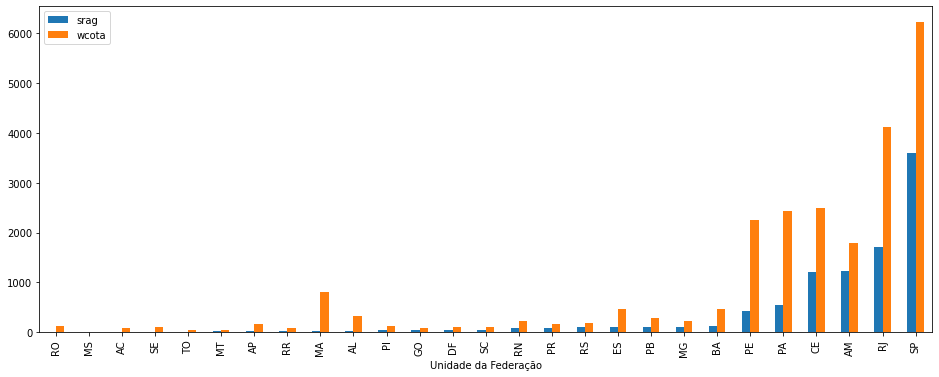

In [26]:
death_count_comparison.sort_values('srag').plot(kind='bar', figsize=(16,6))

In [35]:
estimated_subnotification = (
    (current - baseline)
    .clip(0)
    .sum(axis=1)
    .rename(index=estados_siglas)
    .div(cumulative_covid_cases)
    .clip(1)
    .rename('death_subnotification')
    .to_frame()
)

In [36]:
estimated_subnotification

,death_subnotification
AC,1.000000
AL,1.000000
AM,1.218754
AP,1.000000
BA,1.000000
CE,1.000000
DF,1.022222
ES,1.000000
GO,1.000000
MA,1.000000


In [38]:
estimated_subnotification.to_csv('../data/srag_death_subnotification.csv', index_label = 'state')